# SL-RAT Score Project 

                                                                                                   -Sophia Sarica 


### Introduction

This dataset contains the data from Baltimore County Sewer System SL-RAT Scores.SL-RAT is an acoustic technology that provides blockage measurement within the pipeline and collects data between 0 to 10. Scores between 0 to 3 indicate the sewer line has a blockage and needs to be clean. SL-RAT scores help to identify the pipelines that need to be clean first. 
SL_RAT Analysis project will analyze SL-RAT Sewer System tool degradation over time and predict when the SL- RAT scores would be 0. 
That would help Baltimore County work on cleaning assessments more timely of overall sewer systems.

### Data and Setup

The following columns contain SL-RAT Score data and GIS Attributes data from Baltimore County Sewer Systems.
 

- `FACILITYID`: Unique number between two manholes.  
- `ACTIVITY_CODE`: Activity type on each assessment 
- `COMPLETED_DATE`: Finish day of Activity  
- `SLRAT_SCORE`: Sl-rat scores between 0-10.
- `TYPE`: Type of the pipe 
- `LINING_TYP`: Type of the pipe connections
- `PIPE_SIZE`: Size of Pipe  
- `PIPE_MATER`: Material of Pipe
- `SLOPE`: Slope for each FacilityID 
- `LENGTH`: Lenght of Pipe
- `INSTALL_DA`: Time since the installation date


In [1]:
#importing libraries
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import time
print('Pandas',pd.__version__)

Pandas 1.3.4


In [2]:
# read the SLRAT data 
df= pd.read_excel('SL_RAT_updated_raw.xlsx')
# df= pd.read_excel('SLRAT_analysis.xlsx')

if 'FacilityID' in df.columns:
    df['FACILITYID'] = df['FacilityID']
    df['COMPLETED_DATE'] = df['ACTUALFINISHDATE']
    df.drop(['FacilityID', 'ACTUALFINISHDATE'], inplace=True, axis =1 )


# needed_rows = ['SLRAT' in x or 'Clean' in x for x in df['ACTIVITY_CODE']]
# df = df[needed_rows].reset_index(drop=True).copy()
df.head()

,Unnamed: 0,WORKORDERID,DESCRIPTION,SLRAT_SCORE,rk,FACILITYID,COMPLETED_DATE
0,0,799085,Gravity Main-SLRAT,NaN,1,0,NaT
1,1,772936,Gravity Main-PM SLRAT,NaN,1,0,NaT
2,2,805492,Gravity Main-PM SLRAT,NaN,1,0,NaT
3,3,774292,Gravity Main-PM SLRAT,NaN,1,0,NaT
4,4,772757,Gravity Main-PM SLRAT,NaN,1,0,NaT


### Check for missing values and datatypes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40706 entries, 0 to 40705
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      40706 non-null  int64         
 1   WORKORDERID     40706 non-null  int64         
 2   DESCRIPTION     40706 non-null  object        
 3   SLRAT_SCORE     35575 non-null  object        
 4   rk              40706 non-null  int64         
 5   FACILITYID      40706 non-null  object        
 6   COMPLETED_DATE  36407 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 2.2+ MB


In [4]:
#Select necessary columns from SL-RAT file
columns= ['FACILITYID','COMPLETED_DATE', 'SLRAT_SCORE', 'rk']

In [5]:
df=df[columns]

In [6]:
df.head()

,FACILITYID,COMPLETED_DATE,SLRAT_SCORE,rk
0,0,NaT,NaN,1
1,0,NaT,NaN,1
2,0,NaT,NaN,1
3,0,NaT,NaN,1
4,0,NaT,NaN,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40706 entries, 0 to 40705
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   FACILITYID      40706 non-null  object        
 1   COMPLETED_DATE  36407 non-null  datetime64[ns]
 2   SLRAT_SCORE     35575 non-null  object        
 3   rk              40706 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.2+ MB


Let's explore the data!

### Removal of Unnecessary Data

We need only sl-rat scores that occur more than once.

In [8]:
# # Adding&removing rk column to get rid of the unnecessary sl-rat scores
# counts = df.FACILITYID.value_counts().to_dict()

# df['rk'] = [counts[x] for x in df.FACILITYID]

# df = df[df.rk > 1].reset_index(drop=True).copy()
# df.drop('rk', axis=1, inplace=True)

fac = set( df[df.rk>1]['FACILITYID'])
print(len(fac))
df = df[df.FACILITYID.isin(fac)].sort_values(by=['FACILITYID', 'COMPLETED_DATE'], ascending=[True, False]).copy().reset_index(drop=True)
df

4213


,FACILITYID,COMPLETED_DATE,SLRAT_SCORE,rk
0,1000-1000M,2017-10-26,0,1
1,1000-1000M,2015-12-05,2,2
2,1000-1000M,NaT,NaN,3
3,1000M-1008,2015-12-05,0,1
4,1000M-1008,NaT,NaN,2
...,...,...,...,...
10513,SV650-51505,NaT,NaN,2
10514,TCM52-TCM22,2017-09-19,NaN,1
10515,TCM52-TCM22,NaT,NaN,2
10516,TCM78-1015,2019-01-16,4,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10518 entries, 0 to 10517
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   FACILITYID      10518 non-null  object        
 1   COMPLETED_DATE  9651 non-null   datetime64[ns]
 2   SLRAT_SCORE     9688 non-null   object        
 3   rk              10518 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 328.8+ KB


In [10]:
df.shape

(10518, 4)

In [11]:
df

,FACILITYID,COMPLETED_DATE,SLRAT_SCORE,rk
0,1000-1000M,2017-10-26,0,1
1,1000-1000M,2015-12-05,2,2
2,1000-1000M,NaT,NaN,3
3,1000M-1008,2015-12-05,0,1
4,1000M-1008,NaT,NaN,2
...,...,...,...,...
10513,SV650-51505,NaT,NaN,2
10514,TCM52-TCM22,2017-09-19,NaN,1
10515,TCM52-TCM22,NaT,NaN,2
10516,TCM78-1015,2019-01-16,4,1


In [12]:
# df[df.FACILITYID=='10171-10170']

In [13]:
import numpy as np
def agg_func(x):
    """
    I have made an assumption here. 
    it may have many records and on multiple records, pipes may have been cleaned in between.
    so I checked only the first 2 occurance and calculated the rate.
    eg: first rate 9  on March 1
    second rate 7 on March 15
    I calculated the rate by (7 - 9) / 30 
    
    if rate is positive, I used none because probably it is cleaned and I cannot calculate the rate
    """
    
    sc = list(x.SLRAT_SCORE)
    dt = list(x.COMPLETED_DATE)
#     name = x.FACILITYID.values[0]
    
    for i in range(len(sc)):
        sc_ = sc[i: i+2]
        dt_ = dt[i: i+2]
        
        if len(sc_) != 2:
#             print(name, len(sc_))
            return None
    
        if pd.isna(sc_).sum() == 0 and pd.isna(dt_).sum() == 0:
            sc1 = sc_[1]
            sc0 = sc_[0]
            dt1 = dt_[1]
            dt0 = dt_[0]
            break
    
#     print(sc0, sc1, dt0, dt1)
    if pd.isna(sc1) or pd.isna(sc0):
        return None
    
    if sc1 <= sc0:
        return None
    
    days = (dt1 - dt0).days
    if days == 0:
        return None
    
    rate =  (int(sc1) - int(sc0)) / days
#     print(rate)
    return rate

In [14]:
rate = df.groupby(by='FACILITYID').apply(agg_func)
rate

FACILITYID
1000-1000M    -0.002894
1000M-1008          NaN
1004-946      -0.003315
10051-9502          NaN
1006-902            NaN
                 ...   
F4136-63762         NaN
NS968-14335         NaN
SV650-51505         NaN
TCM52-TCM22         NaN
TCM78-1015          NaN
Length: 4213, dtype: float64

In [15]:
len(rate)

4213

In [16]:
sum (rate < 0)

1187

In [17]:
df_rate = pd.DataFrame()
df_rate['FACILITYID'] = rate.index
df_rate['rate'] = rate.values

df_rate.dropna(inplace=True)
df_rate.shape

(1253, 2)

I'm trying to get more data.

In [18]:
#Read the data from GIS features
df_GIS= pd.read_excel('ssGravityMain-GIS_Attributes.xlsx')

In [19]:
df_GIS.head().T

,0,1,2,3,4
FACILITYID,42453-42452,42458-42457,42457-42452,42452-42451,42451-42450
TYPE,COLLECTOR,COLLECTOR,COLLECTOR,COLLECTOR,COLLECTOR
SEWER_SERV,83-94-00-00,83-94-00-00,83-94-00-00,83-94-00-00,83-94-00-00
PIPE_SIZE,8,8,8,8,8
PIPE_MATER,UNKNOWN,ASBESTOS CEMENT,ASBESTOS CEMENT,UNKNOWN,UNKNOWN
SLOPE,1.7,0.4,0.4,0.4,0.4
DESIGN_LEN,70.3,71.3,139.1,335.8,387.7
LENGTH,70.33,71.3,139.18,335.83,387.79
UPSTREAM_I,688.36,688.1,687.72,687.07,685.63
DOWNSTREAM,687.17,687.82,687.17,685.73,684.03


In [20]:
#Select important columns from GIS
GIS_columns= [
    'FACILITYID',
    'TYPE',
    'LINING_TYP',
    'PIPE_SIZE',
    'PIPE_MATER',
    'SLOPE',
    'LENGTH',
    'INSTALL_DA',
    'UPSTREAM_I',
    'DOWNSTREAM'
]
df_GIS = df_GIS[GIS_columns]

In [21]:
df_GIS.head()

,FACILITYID,TYPE,LINING_TYP,PIPE_SIZE,PIPE_MATER,SLOPE,LENGTH,INSTALL_DA,UPSTREAM_I,DOWNSTREAM
0,42453-42452,COLLECTOR,NONE,8,UNKNOWN,1.7,70.33,1970-01-01,688.36,687.17
1,42458-42457,COLLECTOR,NONE,8,ASBESTOS CEMENT,0.4,71.30,1970-01-01,688.10,687.82
2,42457-42452,COLLECTOR,NONE,8,ASBESTOS CEMENT,0.4,139.18,1970-01-01,687.72,687.17
3,42452-42451,COLLECTOR,NONE,8,UNKNOWN,0.4,335.83,1970-01-01,687.07,685.73
4,42451-42450,COLLECTOR,NONE,8,UNKNOWN,0.4,387.79,1970-01-01,685.63,684.03


In [22]:
df_GIS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62728 entries, 0 to 62727
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   FACILITYID  62728 non-null  object        
 1   TYPE        62728 non-null  object        
 2   LINING_TYP  62663 non-null  object        
 3   PIPE_SIZE   62728 non-null  int64         
 4   PIPE_MATER  62371 non-null  object        
 5   SLOPE       62728 non-null  float64       
 6   LENGTH      62728 non-null  float64       
 7   INSTALL_DA  61600 non-null  datetime64[ns]
 8   UPSTREAM_I  62728 non-null  float64       
 9   DOWNSTREAM  62728 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 4.8+ MB


In [23]:
#Combining two data frame 
df_merged = pd.merge(df_rate, df_GIS,  how='left', left_on=['FACILITYID'],right_on=['FACILITYID'])

In [24]:
df_merged.drop('FACILITYID', axis=1, inplace=True)

In [25]:
df_merged.head()

,rate,TYPE,LINING_TYP,PIPE_SIZE,PIPE_MATER,SLOPE,LENGTH,INSTALL_DA,UPSTREAM_I,DOWNSTREAM
0,-0.002894,COLLECTOR,NONE,12.0,VITRIFIED CLAY PIPE,0.49,400.69,1926-01-01,464.26,462.33
1,-0.003315,COLLECTOR,NONE,8.0,VITRIFIED CLAY PIPE,2.50,374.65,1926-01-01,478.42,469.26
2,-0.002532,COLLECTOR,NONE,8.0,VITRIFIED CLAY PIPE,2.00,385.08,1926-01-01,384.65,376.80
3,-0.004082,COLLECTOR,NONE,8.0,VITRIFIED CLAY PIPE,2.00,301.28,1926-01-01,390.86,384.75
4,-0.008889,COLLECTOR,NONE,15.0,VITRIFIED CLAY PIPE,0.30,302.96,1950-01-01,9.68,8.81


In [26]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1253 entries, 0 to 1252
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   rate        1253 non-null   float64       
 1   TYPE        1249 non-null   object        
 2   LINING_TYP  1249 non-null   object        
 3   PIPE_SIZE   1249 non-null   float64       
 4   PIPE_MATER  1249 non-null   object        
 5   SLOPE       1249 non-null   float64       
 6   LENGTH      1249 non-null   float64       
 7   INSTALL_DA  1235 non-null   datetime64[ns]
 8   UPSTREAM_I  1249 non-null   float64       
 9   DOWNSTREAM  1249 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 107.7+ KB


In [27]:
# Converting datetime variable 
today = np.datetime64('today') 

def days_passed(d):
    return ( today - d).days


In [28]:
df_merged['time_since_install_da'] = [days_passed(x) for x in df_merged['INSTALL_DA']]
df_merged.drop('INSTALL_DA', axis=1, inplace=True)
df_merged.head()

,rate,TYPE,LINING_TYP,PIPE_SIZE,PIPE_MATER,SLOPE,LENGTH,UPSTREAM_I,DOWNSTREAM,time_since_install_da
0,-0.002894,COLLECTOR,NONE,12.0,VITRIFIED CLAY PIPE,0.49,400.69,464.26,462.33,35192.0
1,-0.003315,COLLECTOR,NONE,8.0,VITRIFIED CLAY PIPE,2.50,374.65,478.42,469.26,35192.0
2,-0.002532,COLLECTOR,NONE,8.0,VITRIFIED CLAY PIPE,2.00,385.08,384.65,376.80,35192.0
3,-0.004082,COLLECTOR,NONE,8.0,VITRIFIED CLAY PIPE,2.00,301.28,390.86,384.75,35192.0
4,-0.008889,COLLECTOR,NONE,15.0,VITRIFIED CLAY PIPE,0.30,302.96,9.68,8.81,26426.0


In [29]:
df_merged.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1253 entries, 0 to 1252
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   rate                   1253 non-null   float64
 1   TYPE                   1249 non-null   object 
 2   LINING_TYP             1249 non-null   object 
 3   PIPE_SIZE              1249 non-null   float64
 4   PIPE_MATER             1249 non-null   object 
 5   SLOPE                  1249 non-null   float64
 6   LENGTH                 1249 non-null   float64
 7   UPSTREAM_I             1249 non-null   float64
 8   DOWNSTREAM             1249 non-null   float64
 9   time_since_install_da  1235 non-null   float64
dtypes: float64(7), object(3)
memory usage: 107.7+ KB


In [30]:
#check the number of rows and columns in the dataframe
df_merged.shape

(1253, 10)

Now, the data is ready for further analysis.


### Sanity check and handling Data Inconsistencies


### Visualizations

<AxesSubplot:>

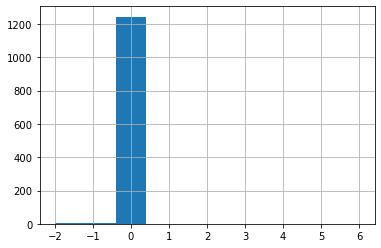

In [31]:
df_merged.rate.hist()

<AxesSubplot:>

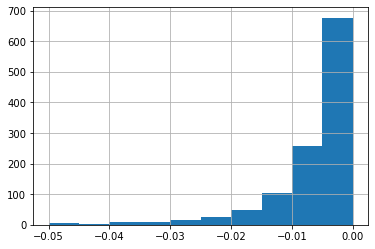

In [32]:
#print(df_merged.rate.value_counts())
df_merged.rate.hist(range=[-0.05 ,0])

COLLECTOR          1247
INVERTED SIPHON       2
Name: TYPE, dtype: int64


<AxesSubplot:>

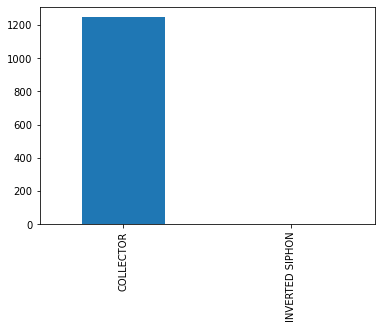

In [33]:
print(df_merged.TYPE.value_counts())
df_merged.TYPE.value_counts().plot(kind='bar')

NONE              1085
CURED IN PLACE     145
FOLD AND FORM       11
Cured in Place       4
UNKNOWN              4
Name: LINING_TYP, dtype: int64


<AxesSubplot:>

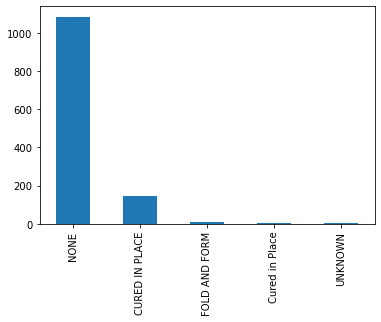

In [34]:
print(df_merged.LINING_TYP.value_counts())
df_merged.LINING_TYP.value_counts().plot(kind='bar')

I noticed some inconsistencies and fixed them below

In [35]:
df_merged.replace({
    'Cured in Place': 'CURED IN PLACE'
}, inplace=True)

NONE              1085
CURED IN PLACE     149
FOLD AND FORM       11
UNKNOWN              4
Name: LINING_TYP, dtype: int64


<AxesSubplot:>

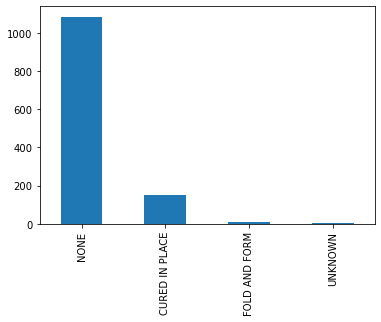

In [36]:
print(df_merged.LINING_TYP.value_counts())
df_merged.LINING_TYP.value_counts().plot(kind='bar')

<AxesSubplot:>

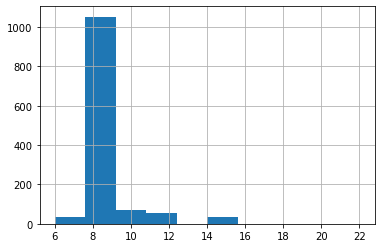

In [37]:
df_merged.PIPE_SIZE.hist()

VITRIFIED CLAY PIPE                953
POLYVINYL CHLORIDE                 108
UNKNOWN                             78
DUCTILE IRON PIPE                   45
CAST IRON                           43
CONCRETE PIPE                       10
ACRYLONITRILE BUTADIENE STYRENE      9
ASBESTOS CEMENT                      2
REINFORCED PLASTIC PIPE              1
Name: PIPE_MATER, dtype: int64


<AxesSubplot:>

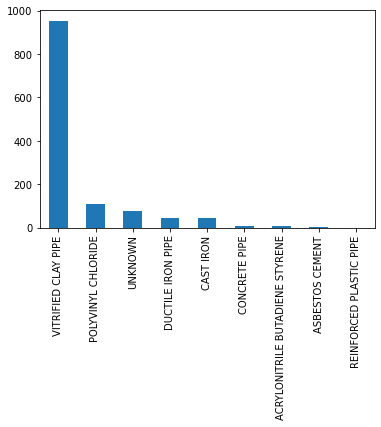

In [38]:

print(df_merged.PIPE_MATER.value_counts())
df_merged.PIPE_MATER.value_counts().plot(kind='bar')

<AxesSubplot:>

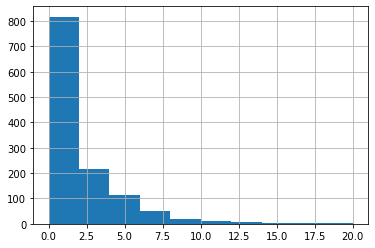

In [39]:
df_merged.SLOPE.hist()

<AxesSubplot:>

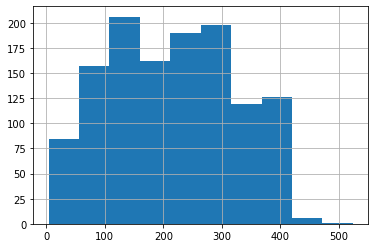

In [40]:
df_merged.LENGTH.hist()

### Calculating Target Values

The target variable will be 1 or 0. If the target variable is 0, it needs to clean within five months; otherwise, the pipeline doesn't require cleaning.



In [41]:
df_merged

,rate,TYPE,LINING_TYP,PIPE_SIZE,PIPE_MATER,SLOPE,LENGTH,UPSTREAM_I,DOWNSTREAM,time_since_install_da
0,-0.002894,COLLECTOR,NONE,12.0,VITRIFIED CLAY PIPE,0.49,400.69,464.26,462.33,35192.0
1,-0.003315,COLLECTOR,NONE,8.0,VITRIFIED CLAY PIPE,2.50,374.65,478.42,469.26,35192.0
2,-0.002532,COLLECTOR,NONE,8.0,VITRIFIED CLAY PIPE,2.00,385.08,384.65,376.80,35192.0
3,-0.004082,COLLECTOR,NONE,8.0,VITRIFIED CLAY PIPE,2.00,301.28,390.86,384.75,35192.0
4,-0.008889,COLLECTOR,NONE,15.0,VITRIFIED CLAY PIPE,0.30,302.96,9.68,8.81,26426.0
...,...,...,...,...,...,...,...,...,...,...
1248,-0.003802,COLLECTOR,NONE,8.0,POLYVINYL CHLORIDE,0.50,37.04,-1.87,-2.06,6337.0
1249,-0.005566,COLLECTOR,NONE,8.0,POLYVINYL CHLORIDE,0.40,76.15,-1.20,-1.51,6337.0
1250,-0.005566,COLLECTOR,NONE,8.0,POLYVINYL CHLORIDE,0.40,51.58,-0.99,-1.20,6337.0
1251,-0.005566,COLLECTOR,NONE,8.0,POLYVINYL CHLORIDE,0.40,50.09,-0.79,-0.99,6337.0


In [42]:
df_merged.dropna(inplace=True)
df_merged = df_merged[df_merged.rate < 0].copy().reset_index(drop=True)

In [54]:
#month = int((1/-r)/30) This formula gives us how many months it will take a pipe connection to decrease by 1. 

In [43]:
import math

def convert_target(r):
    """
whether it needs to be cleaned within the next 5 months 
"""
    
    if r == 0:
        return None
    
    month = int((1/-r)/30)
    
    if month < 5:
        return 0
    return 1

target = df_merged['rate'].apply(convert_target)
target

0       1
1       1
2       1
3       1
4       0
       ..
1166    1
1167    1
1168    1
1169    1
1170    0
Name: rate, Length: 1171, dtype: int64

<AxesSubplot:>

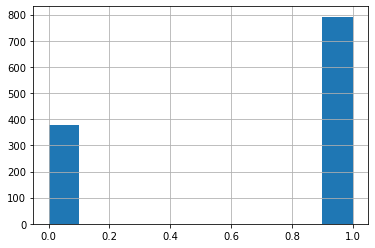

In [44]:
target.hist()

In [45]:
df_merged['target']=target
# df_merged.drop('rate', axis = 1 , inplace=True) # target is drived from rate. we are dropping rate

We dropped the rate column since it is highly correlated with target columns. 

In [46]:
sum(target > 0)

792

In [47]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171 entries, 0 to 1170
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TYPE                   1171 non-null   object 
 1   LINING_TYP             1171 non-null   object 
 2   PIPE_SIZE              1171 non-null   float64
 3   PIPE_MATER             1171 non-null   object 
 4   SLOPE                  1171 non-null   float64
 5   LENGTH                 1171 non-null   float64
 6   UPSTREAM_I             1171 non-null   float64
 7   DOWNSTREAM             1171 non-null   float64
 8   time_since_install_da  1171 non-null   float64
 9   target                 1171 non-null   int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 91.6+ KB


In [51]:
#Checking for missing values

In [48]:
df_merged.isna().sum()

TYPE                     0
LINING_TYP               0
PIPE_SIZE                0
PIPE_MATER               0
SLOPE                    0
LENGTH                   0
UPSTREAM_I               0
DOWNSTREAM               0
time_since_install_da    0
target                   0
dtype: int64

In [49]:
df_merged.target.value_counts().sort_index()

0    379
1    792
Name: target, dtype: int64

In [50]:
df_merged.to_csv('SL_RAT_EDA2.csv')